<a href="https://www.kaggle.com/code/vyshnavkumarp/heartdisease?scriptVersionId=106534960" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
sn.set_style('darkgrid')

In [2]:
import matplotlib
import missingno as msn
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['font.size'] = 15

In [4]:
df = pd.read_csv('../input/heart-disease/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

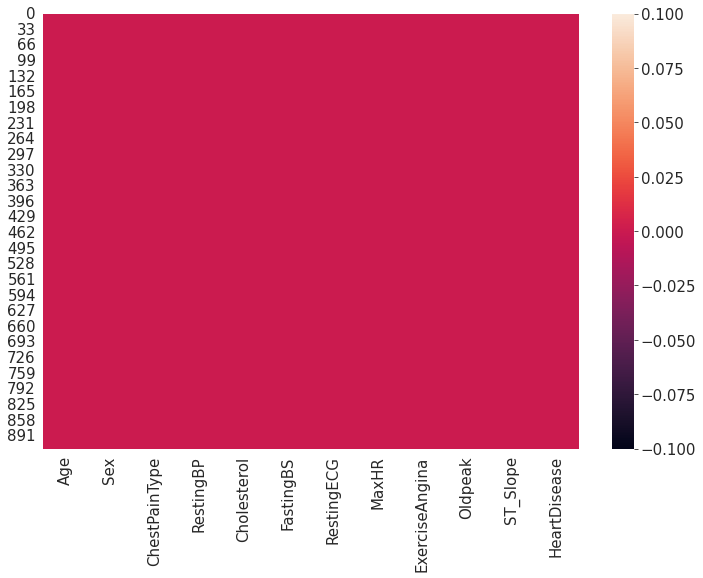

In [9]:
sn.heatmap(df.isnull())

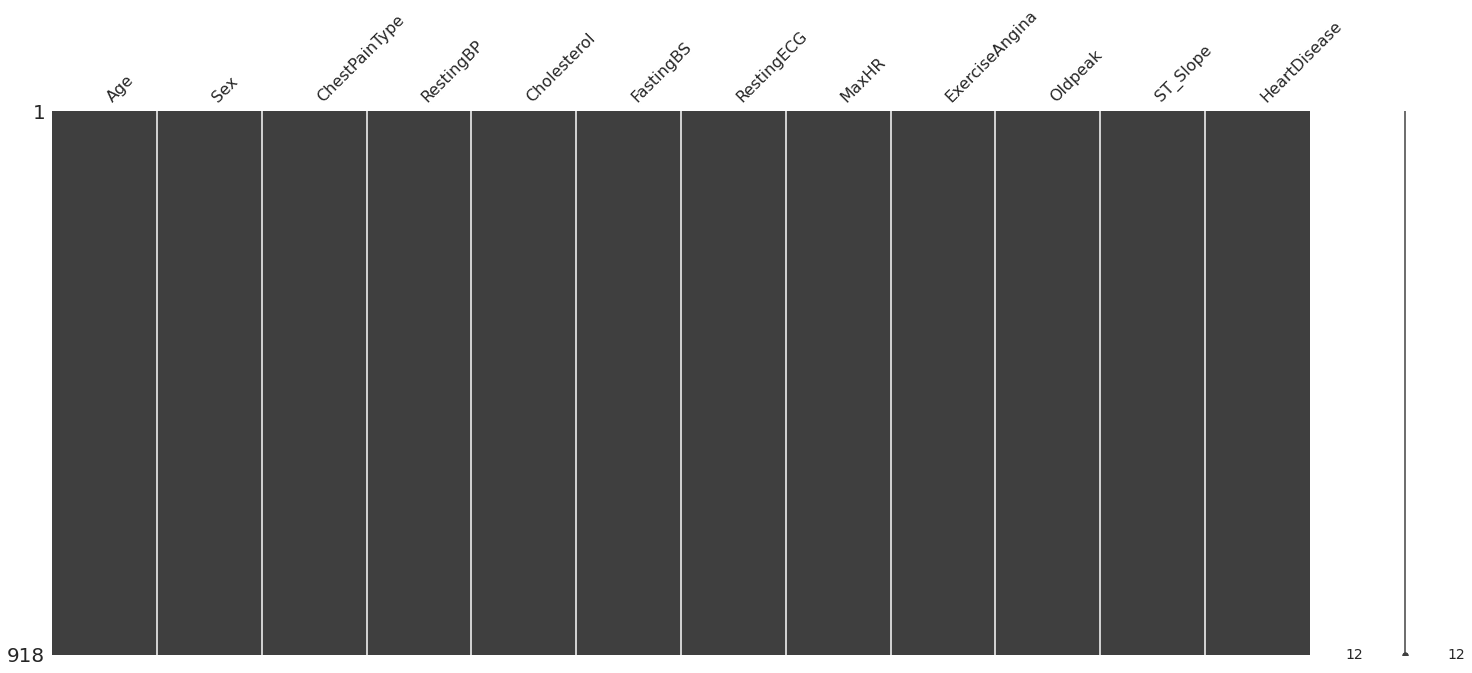

In [10]:
msn.matrix(df)
plt.show()

In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

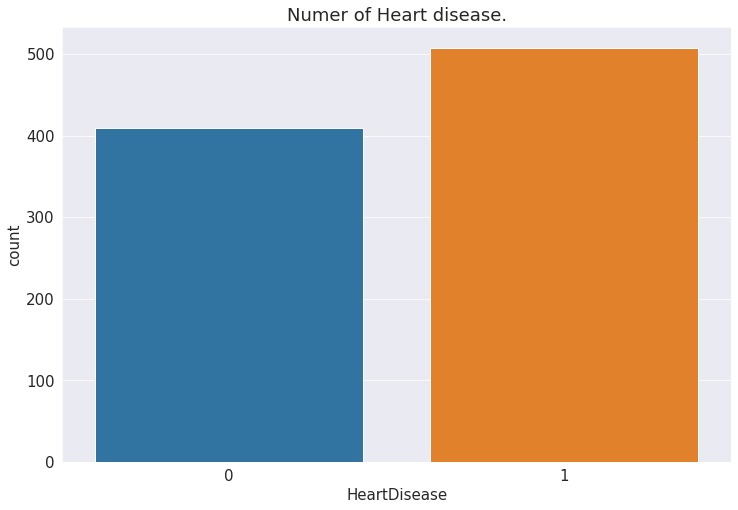

In [13]:
sn.countplot(x='HeartDisease',data=df)
plt.title('Numer of Heart disease.')
plt.show()

In [14]:
df_sex = df.groupby('Sex')['HeartDisease'].value_counts().to_frame(name='count').reset_index()
df_sex

,Sex,HeartDisease,count
0,F,0,143
1,F,1,50
2,M,1,458
3,M,0,267


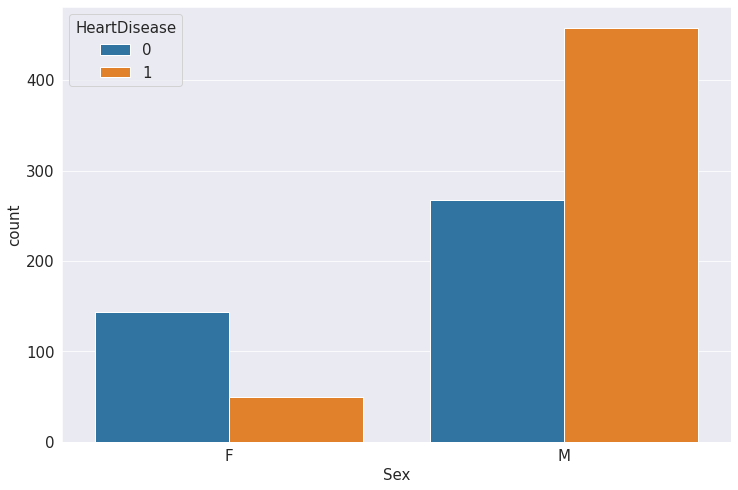

In [15]:
sn.barplot(data=df_sex,x='Sex',y='count',hue='HeartDisease')
plt.show()

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

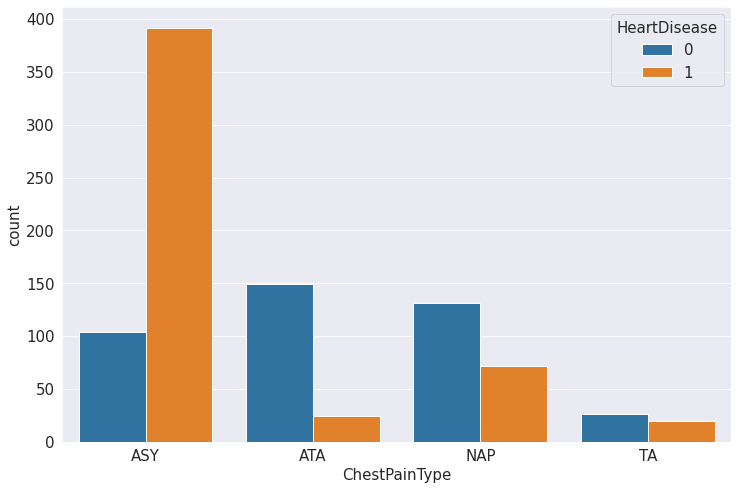

In [16]:
sn.barplot(data=df.groupby('ChestPainType')['HeartDisease'].value_counts().to_frame(name='count').reset_index(),x='ChestPainType',y='count',hue='HeartDisease')

In [17]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [18]:
df['ChestPainType'] = df['ChestPainType'].replace({'ATA':1,'NAP':2,'ASY':3,'TA':4})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,2,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,1,130,283,0,ST,98,N,0.0,Up,0
3,48,F,3,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,2,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [20]:
df['RestingECG'] = df['RestingECG'].map({'Normal':1,'ST':2,'LVH':3})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,N,0.0,Up,0
1,49,F,2,160,180,0,1,156,N,1.0,Flat,1
2,37,M,1,130,283,0,2,98,N,0.0,Up,0
3,48,F,3,138,214,0,1,108,Y,1.5,Flat,1
4,54,M,2,150,195,0,1,122,N,0.0,Up,0


In [21]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0,'Y':1})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,0,0.0,Up,0
1,49,F,2,160,180,0,1,156,0,1.0,Flat,1
2,37,M,1,130,283,0,2,98,0,0.0,Up,0
3,48,F,3,138,214,0,1,108,1,1.5,Flat,1
4,54,M,2,150,195,0,1,122,0,0.0,Up,0


In [22]:
df['ST_Slope'] = df['ST_Slope'].map({'Down':1,'Flat':2,'Up':3})

In [23]:
df['Sex'] = df['Sex'].map({'M':1,'F':0})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,3,0
1,49,0,2,160,180,0,1,156,0,1.0,2,1
2,37,1,1,130,283,0,2,98,0,0.0,3,0
3,48,0,3,138,214,0,1,108,1,1.5,2,1
4,54,1,2,150,195,0,1,122,0,0.0,3,0


In [24]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [25]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [26]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [27]:
df.drop(outlier_index,inplace=True)

In [28]:
df.shape

(896, 12)

In [29]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.060274,0.225629,0.276656,-0.089148,0.200563,0.211755,-0.393312,0.218797,0.258040,-0.269981,0.290322
Sex,0.060274,1.000000,0.182194,0.012642,-0.207939,0.116992,-0.011534,-0.184496,0.192643,0.105722,-0.146350,0.302407
ChestPainType,0.225629,0.182194,1.000000,0.084819,-0.135517,0.155440,0.121707,-0.276885,0.322929,0.301063,-0.350289,0.465138
RestingBP,0.276656,0.012642,0.084819,1.000000,0.106418,0.079280,0.097897,-0.107524,0.173592,0.193585,-0.093324,0.110903
Cholesterol,-0.089148,-0.207939,-0.135517,0.106418,1.000000,-0.283754,0.120048,0.247391,-0.024185,0.061705,0.122664,-0.246479
FastingBS,0.200563,0.116992,0.155440,0.079280,-0.283754,1.000000,0.052833,-0.124254,0.055515,0.055002,-0.174243,0.270570
RestingECG,0.211755,-0.011534,0.121707,0.097897,0.120048,0.052833,1.000000,0.033477,0.042172,0.118728,-0.090877,0.067972
MaxHR,-0.393312,-0.184496,-0.276885,-0.107524,0.247391,-0.124254,0.033477,1.000000,-0.387345,-0.165300,0.337677,-0.408679
ExerciseAngina,0.218797,0.192643,0.322929,0.173592,-0.024185,0.055515,0.042172,-0.387345,1.000000,0.404487,-0.430663,0.499358
Oldpeak,0.258040,0.105722,0.301063,0.193585,0.061705,0.055002,0.118728,-0.165300,0.404487,1.000000,-0.501348,0.409335


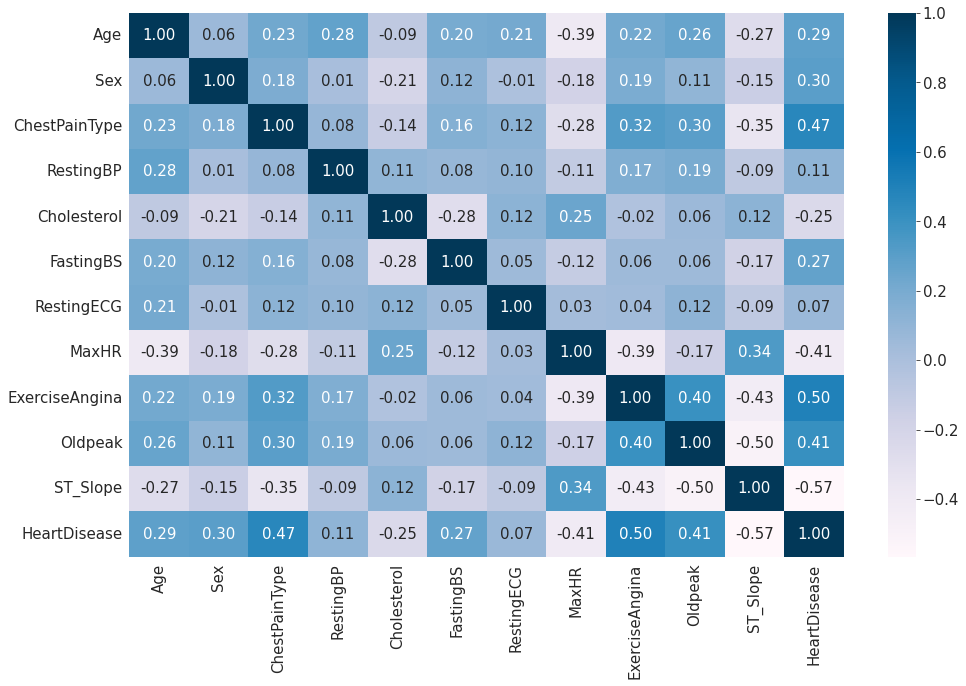

In [30]:
plt.figure(figsize=(16,10))
sn.heatmap(df.corr(),cmap='PuBu',annot=True,fmt='.2f')
plt.show()

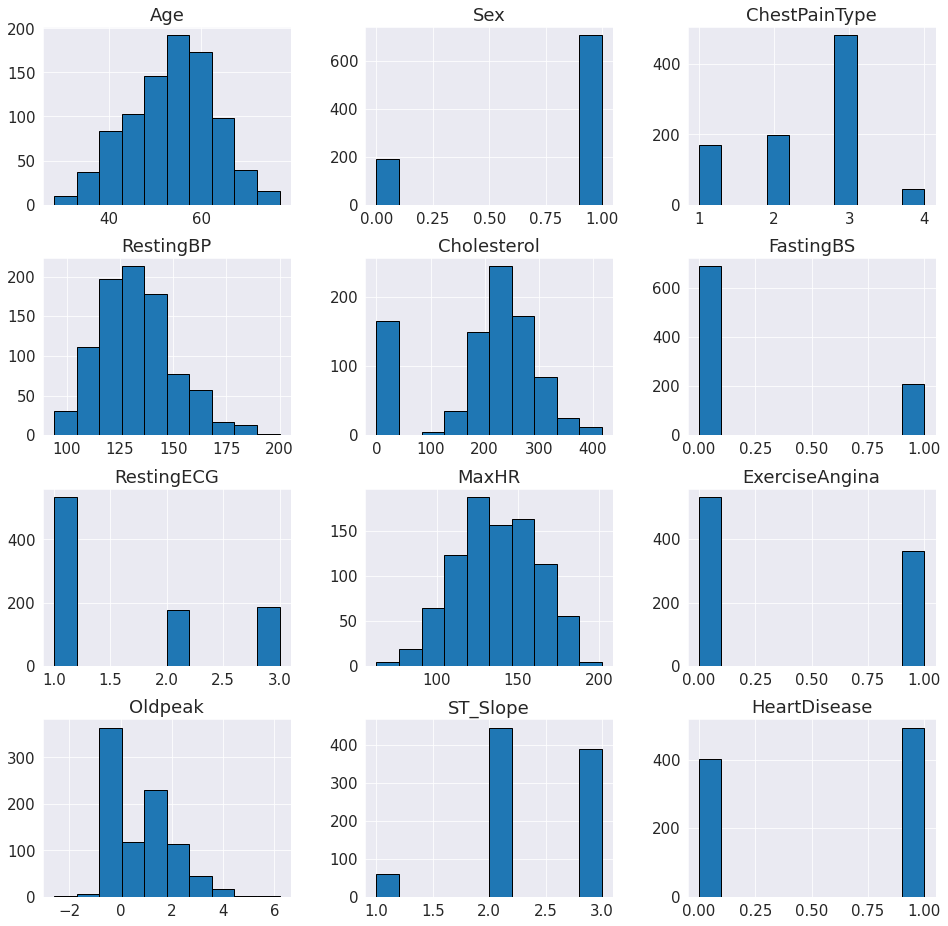

In [31]:
df.hist(figsize=(16,16),edgecolor='black')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

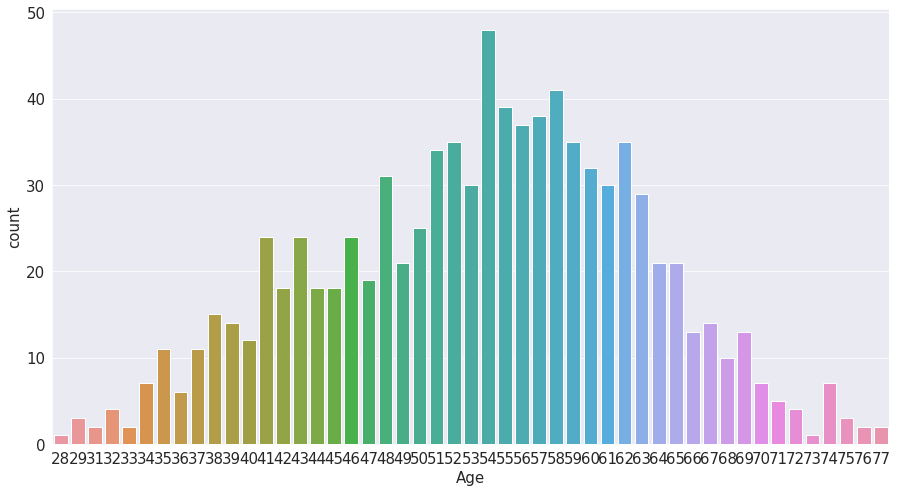

In [32]:
plt.figure(figsize=(15,8))
sn.countplot(x='Age',data=df)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
x = df.drop('HeartDisease',axis=1)
y = df.HeartDisease

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

print('x_train shape : {}, y_train shape : {}, x_test shape : {}, y_test shape : {}.'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train shape : (716, 11), y_train shape : (716,), x_test shape : (180, 11), y_test shape : (180,).


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)

print('Accuracy of Logistic Regression : ', lr.score(x_test,y_test)*100)

Accuracy of Logistic Regression :  88.88888888888889


In [38]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print('Accuracy of K-nearest Neighbors classifier : ', knn.score(x_test,y_test)*100)

Accuracy of K-nearest Neighbors classifier :  71.66666666666667


In [39]:
k_range = list(range(1,35))
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

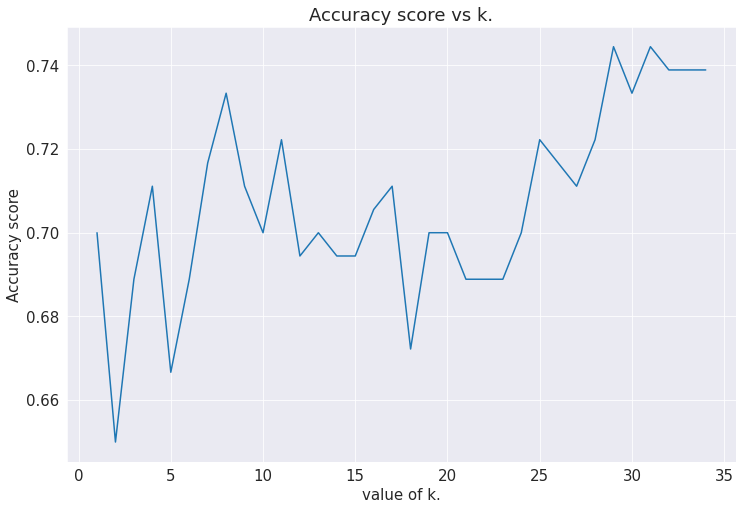

In [40]:
plt.plot(k_range,scores)
plt.xlabel('value of k.')
plt.ylabel('Accuracy score')
plt.title('Accuracy score vs k.')
plt.show()

In [41]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

print('Accuracy of Decision tree classifier : ', dt.score(x_test,y_test)*100)

Accuracy of Decision tree classifier :  82.77777777777777


In [42]:
nb = GaussianNB()
nb.fit(x_train,y_train)
pred_nb = nb.predict(x_test)
print('Accuracy of Naive Bayesian : ', nb.score(x_test,y_test)*100)

Accuracy of Naive Bayesian :  91.11111111111111


In [43]:
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)
pred_svm = svm.predict(x_test)
print('Accuracy of Support Vector Machine : ', svm.score(x_test,y_test)*100)

Accuracy of Support Vector Machine :  88.88888888888889
